In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 

from sklearn import metrics
import matplotlib.pyplot as plt

from sklearn import neighbors
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix

import seaborn as sns


In [2]:
iris = pd.read_csv("iris_dataset.csv")


In [3]:
species = preprocessing.LabelEncoder()
iris['species_n'] = species.fit_transform(iris['species'])
X = iris.drop('species',axis='columns')
X = X.drop('species_n',axis='columns')
iris

,petal_length,petal_width,species,species_n
0,1.4,0.2,Iris-setosa,0
1,1.4,0.2,Iris-setosa,0
2,1.3,0.2,Iris-setosa,0
3,1.5,0.2,Iris-setosa,0
4,1.4,0.2,Iris-setosa,0
...,...,...,...,...
145,5.2,2.3,Iris-virginica,2
146,5.0,1.9,Iris-virginica,2
147,5.2,2.0,Iris-virginica,2
148,5.4,2.3,Iris-virginica,2


In [4]:
X = iris[['petal_length','petal_width']].values
y = iris['species_n']

# Partie 1

## 1 - create only one classifier to detect all Iris species at the same time using KNeighborsClassifier from Scikit-learn

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(X, y)
# STEP 3: make predictions on the testing set
y_pred = knn.predict(X_test)

kp = knn.predict([[4,1]])
if kp == 0:
    print('SETOSA')
if kp == 1:
    print('VERSICOLOR')
if kp == 2:
    print('VERSICOLOR')

VERSICOLOR


## 2 - plot the decision boundaries of your model. Compare it from the one from LineaSVC, is it better ?

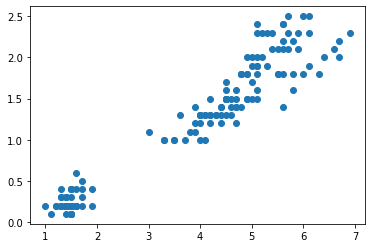

In [6]:
x0 = iris.loc[:,"petal_length"]
x1 = iris.loc[:,"petal_width"]
plt.scatter(x0, x1)
plt.show()

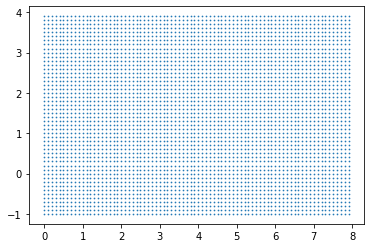

In [7]:
PAD = 1.0 

x0_min, x0_max = np.round(x0.min())-PAD, np.round(x0.max()+PAD)
x1_min, x1_max = np.round(x1.min())-PAD, np.round(x1.max()+PAD)

H = 0.1

x0_axis_range = np.arange(x0_min,x0_max, H)
x1_axis_range = np.arange(x1_min,x1_max, H)

xx0, xx1 = np.meshgrid(x0_axis_range, x1_axis_range)
plt.scatter(xx0, xx1, s=0.5)
xx = np.reshape(np.stack((xx0.ravel(),xx1.ravel()),axis=1),(-1,2))


yy_hat = knn.predict(xx) 
yy_prob = knn.predict_proba(xx) 
yy_size = np.max(yy_prob, axis=1)


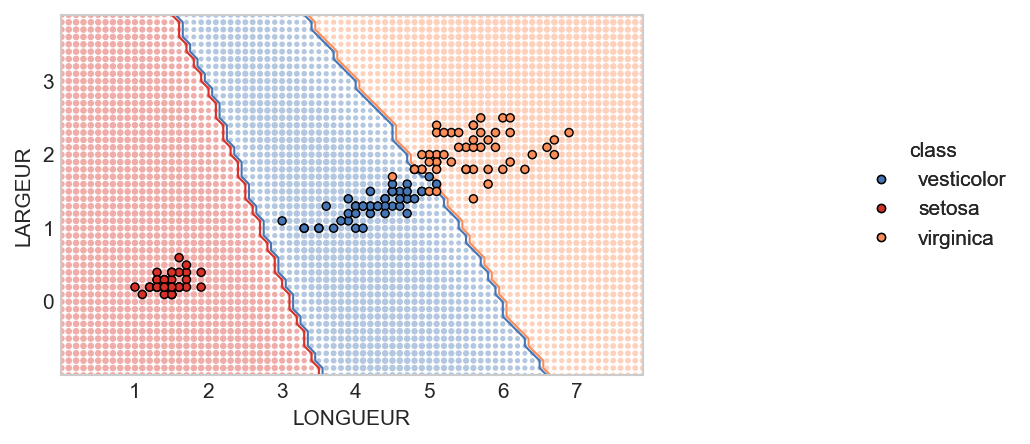

In [8]:
x=X
y = iris['species_n']
PROB_DOT_SCALE = 10 # modifier to scale the probability dots
PROB_DOT_SCALE_POWER = 1 # exponential used to increase/decrease size of prob dots
TRUE_DOT_SIZE = 15 # size of the true labels

from matplotlib.ticker import MaxNLocator # needed for integer only on axis
from matplotlib.lines import Line2D # for creating the custom legend

# make figure
plt.style.use('seaborn-whitegrid') # set style because it looks nice
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5), dpi=150)

# establish colors and colormap
#  * color blind colors, from https://bit.ly/3qJ6LYL
redish = '#d73027'
orangeish = '#fc8d59'
yellowish = '#fee090'
blueish = '#4575b4'
colormap = np.array([redish,blueish,orangeish])

ax.scatter(xx[:,0], xx[:,1], c=colormap[yy_hat], alpha=0.4, 
           s=PROB_DOT_SCALE*yy_size**PROB_DOT_SCALE_POWER, linewidths=0,)


ax.contour(x0_axis_range, x1_axis_range, 
           np.reshape(yy_hat,(xx0.shape[0],-1)), 
           levels=3, linewidths=1, 
           colors=[redish,blueish, blueish,orangeish,])


ax.scatter(x[:,0], x[:,1], c=colormap[y], s=TRUE_DOT_SIZE, zorder=3, 
           linewidths=0.7, edgecolor='k')

# create legends
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()

ax.set_ylabel('LARGEUR')
ax.set_xlabel('LONGUEUR')

legend_class = []
for flower_class, color in zip(['vesticolor', 'setosa', 'virginica'], [blueish, redish, orangeish]):
    legend_class.append(Line2D([0], [0], marker='o', label=flower_class,ls='None',
                               markerfacecolor=color, markersize=np.sqrt(TRUE_DOT_SIZE), 
                               markeredgecolor='k', markeredgewidth=0.7))

# iterate over each of the probabilities to create prob legend
prob_values = [0.4, 0.6, 0.8, 1.0]
legend_prob = []
for prob in prob_values:
    legend_prob.append(Line2D([0], [0], marker='o', label=prob, ls='None', alpha=0.8,
                              markerfacecolor='grey', 
                              markersize=np.sqrt(PROB_DOT_SCALE*prob**PROB_DOT_SCALE_POWER), 
                              markeredgecolor='k', markeredgewidth=0))



legend1 = ax.legend(handles=legend_class, loc='center', 
                    bbox_to_anchor=(1.5, 0.5),
                    frameon=False, title='class')


ax.add_artist(legend1) # add legend back after it disappears

ax.set_yticks(np.arange(x1_min,x1_max, 1)) # I don't like the decimals
ax.grid(False) # remove gridlines (inherited from 'seaborn-whitegrid' style)

# only use integers for axis tick labels
# from: https://stackoverflow.com/a/34880501/9214620
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# remove first ticks from axis labels, for looks
# from: https://stackoverflow.com/a/19503828/9214620
ax.set_xticks(ax.get_xticks()[1:-1])
ax.set_yticks(np.arange(x1_min,x1_max, 1)[1:])

# set the aspect ratio to 1, for looks
ax.set_aspect(1)

# plt.savefig('knn.svg',dpi=300,format='svg', bbox_inches = "tight")
# plt.savefig('knn.png',dpi=150,bbox_inches = "tight")
plt.show()

## 3 -  display the performance indicators of your model : precision score, recall score and confusion matrix

In [9]:
knn.fit(X_test, y_test)
score = knn.score(X_train, y_train)
print("Score: ", score)

Score:  0.7777777777777778


In [10]:
ypred = knn.predict(X_test)
cr = classification_report(y_test, ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       1.00      0.24      0.38        17
           2       0.62      1.00      0.77        18

    accuracy                           0.78        60
   macro avg       0.85      0.75      0.70        60
weighted avg       0.86      0.78      0.74        60



In [11]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['SETOSA','VERSICOLOR','VIRGINICA'], 
                     columns = ['SETOSA','VERSICOLOR','VIRGINICA'],)
cm_df

,SETOSA,VERSICOLOR,VIRGINICA
SETOSA,25,0,0
VERSICOLOR,2,4,11
VIRGINICA,0,0,18


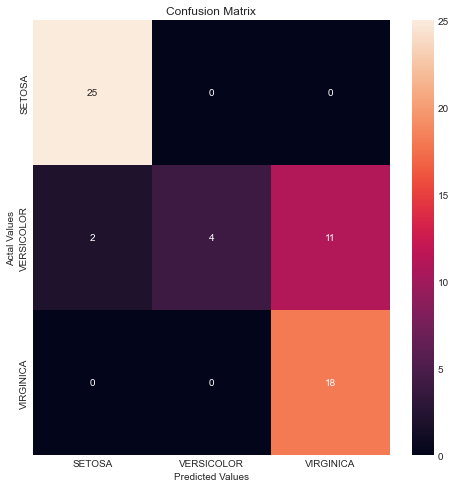

In [12]:
#Plotting the confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## 4 - try different values of the hyper-parameter K (the number of neighbors) to get the better score. Which value is best ?

In [50]:

k_range = range(1, 50)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

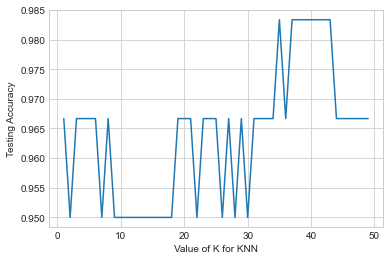

In [51]:

plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

# Partie 2

## 1 - create one decision tree classifier to detect all Iris species at the same time using DecisionTreeClassifier from Scikit-learn

In [52]:
data = pd.DataFrame(X, columns = ['petal_length','petal_width'])
data["answer"] = iris["species_n"]

,petal_length,petal_width,answer
petal_length,1.000000,0.962757,0.949043
petal_width,0.962757,1.000000,0.956464
answer,0.949043,0.956464,1.000000


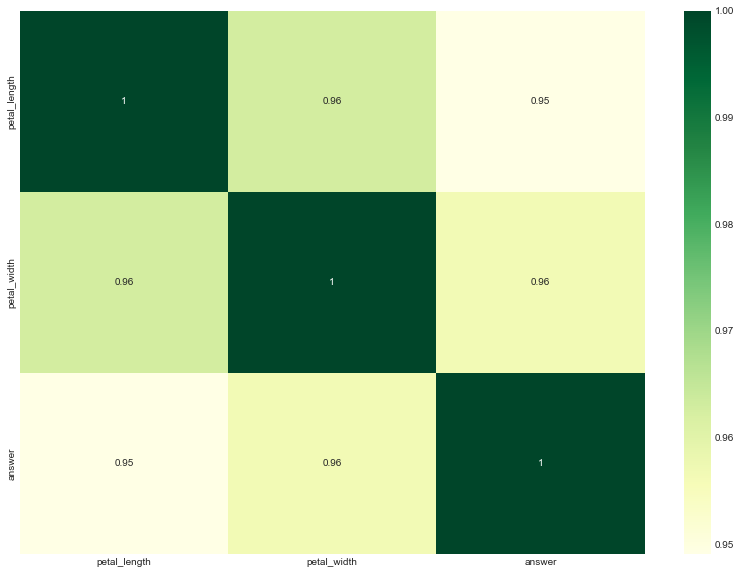

In [53]:
%matplotlib inline 
plt.figure(figsize = (14,10))
sns.heatmap(data.astype("float").corr(), cmap = "YlGn", annot= True)
data.corr()

In [58]:

y = iris['species']
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)
clf2 = DecisionTreeClassifier(ccp_alpha=0.0, 
                            class_weight=None, 
                            criterion='gini',
                            max_depth=3, max_features=None, 
                            max_leaf_nodes=None,
                            min_impurity_decrease=0.0,
                            min_impurity_split=None,
                            min_samples_leaf=1, 
                            min_samples_split=2,
                            min_weight_fraction_leaf=0.0,
                            random_state=None, splitter='best')
clf2.fit(X, y)
clf2.predict([[4,1]])


array(['Iris-versicolor'], dtype=object)

## 2 - display the tree as PNG image. What do you understand ? Using a basic plot of the dataset do the questions asked make sense ?

In [55]:
import graphviz
from sklearn.tree import export_graphviz

In [56]:
t = iris[['petal_length','petal_width']].columns


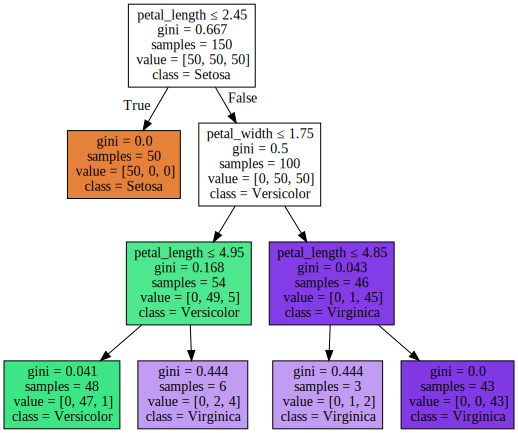

In [57]:
a = export_graphviz(clf2, 
                    feature_names = t,
                    class_names = ['Setosa','Versicolor','Virginica'], 
                    filled = True,
                    special_characters = True)
                    

graphviz.Source(a)

## 3 - plot the decision boundaries of your model. Compare it from the one from LineaSVC and KNeighborsClassifier, which one is better ?

In [28]:
x=X
y = iris['species_n']
clf2.fit(x, y)

DecisionTreeClassifier(max_depth=3)

In [29]:
yy_hat = clf2.predict(xx) 
yy_prob = clf2.predict_proba(xx) 
yy_size = np.max(yy_prob, axis=1)

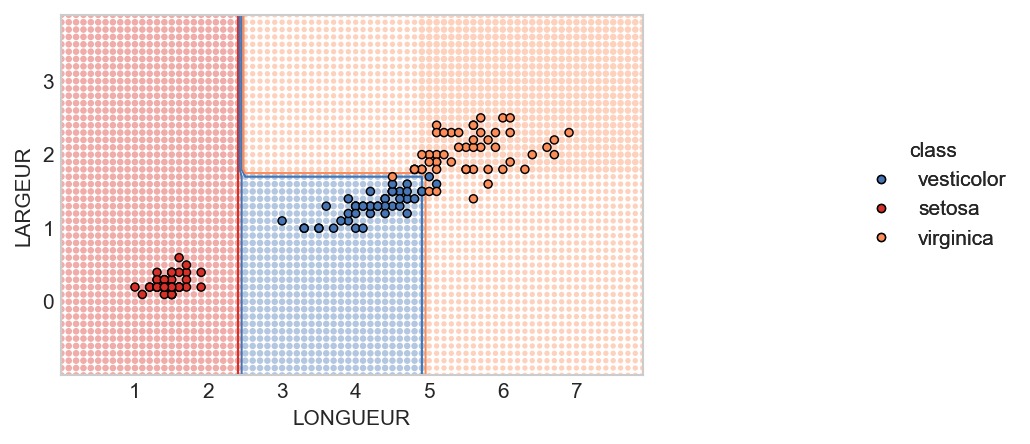

In [30]:
PROB_DOT_SCALE = 10 # modifier to scale the probability dots
PROB_DOT_SCALE_POWER = 1 # exponential used to increase/decrease size of prob dots
TRUE_DOT_SIZE = 15 # size of the true labels

from matplotlib.ticker import MaxNLocator # needed for integer only on axis
from matplotlib.lines import Line2D # for creating the custom legend

# make figure
plt.style.use('seaborn-whitegrid') # set style because it looks nice
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5), dpi=150)

# establish colors and colormap
#  * color blind colors, from https://bit.ly/3qJ6LYL
redish = '#d73027'
orangeish = '#fc8d59'
yellowish = '#fee090'
blueish = '#4575b4'
colormap = np.array([redish,blueish,orangeish])

ax.scatter(xx[:,0], xx[:,1], c=colormap[yy_hat], alpha=0.4, 
           s=PROB_DOT_SCALE*yy_size**PROB_DOT_SCALE_POWER, linewidths=0,)


ax.contour(x0_axis_range, x1_axis_range, 
           np.reshape(yy_hat,(xx0.shape[0],-1)), 
           levels=3, linewidths=1, 
           colors=[redish,blueish, blueish,orangeish,])


ax.scatter(x[:,0], x[:,1], c=colormap[y], s=TRUE_DOT_SIZE, zorder=3, 
           linewidths=0.7, edgecolor='k')

# create legends
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()

ax.set_ylabel('LARGEUR')
ax.set_xlabel('LONGUEUR')

legend_class = []
for flower_class, color in zip(['vesticolor', 'setosa', 'virginica'], [blueish, redish, orangeish]):
    legend_class.append(Line2D([0], [0], marker='o', label=flower_class,ls='None',
                               markerfacecolor=color, markersize=np.sqrt(TRUE_DOT_SIZE), 
                               markeredgecolor='k', markeredgewidth=0.7))

# iterate over each of the probabilities to create prob legend
prob_values = [0.4, 0.6, 0.8, 1.0]
legend_prob = []
for prob in prob_values:
    legend_prob.append(Line2D([0], [0], marker='o', label=prob, ls='None', alpha=0.8,
                              markerfacecolor='grey', 
                              markersize=np.sqrt(PROB_DOT_SCALE*prob**PROB_DOT_SCALE_POWER), 
                              markeredgecolor='k', markeredgewidth=0))



legend1 = ax.legend(handles=legend_class, loc='center', 
                    bbox_to_anchor=(1.5, 0.5),
                    frameon=False, title='class')


ax.add_artist(legend1) # add legend back after it disappears

ax.set_yticks(np.arange(x1_min,x1_max, 1)) # I don't like the decimals
ax.grid(False) # remove gridlines (inherited from 'seaborn-whitegrid' style)

# only use integers for axis tick labels
# from: https://stackoverflow.com/a/34880501/9214620
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# remove first ticks from axis labels, for looks
# from: https://stackoverflow.com/a/19503828/9214620
ax.set_xticks(ax.get_xticks()[1:-1])
ax.set_yticks(np.arange(x1_min,x1_max, 1)[1:])

# set the aspect ratio to 1, for looks
ax.set_aspect(1)

# plt.savefig('knn.svg',dpi=300,format='svg', bbox_inches = "tight")
# plt.savefig('knn.png',dpi=150,bbox_inches = "tight")
plt.show()

## 4 - display the performance indicators of your model : precision score, recall score and confusion matrix

In [31]:
clf2.fit(X_test, y_test)
score = clf2.score(X_train, y_train)
print("Score: ", score)

Score:  0.9333333333333333


In [32]:
ypred = clf2.predict(X_test)
cr = classification_report(y_test, ypred)
print(cr)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        25
Iris-versicolor       1.00      0.94      0.97        17
 Iris-virginica       0.95      1.00      0.97        18

       accuracy                           0.98        60
      macro avg       0.98      0.98      0.98        60
   weighted avg       0.98      0.98      0.98        60



In [33]:
y_pred = clf2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_df2 = pd.DataFrame(cm,
                     index = ['SETOSA','VERSICOLOR','VIRGINICA'], 
                     columns = ['SETOSA','VERSICOLOR','VIRGINICA'],)
cm_df2

,SETOSA,VERSICOLOR,VIRGINICA
SETOSA,25,0,0
VERSICOLOR,0,16,1
VIRGINICA,0,0,18


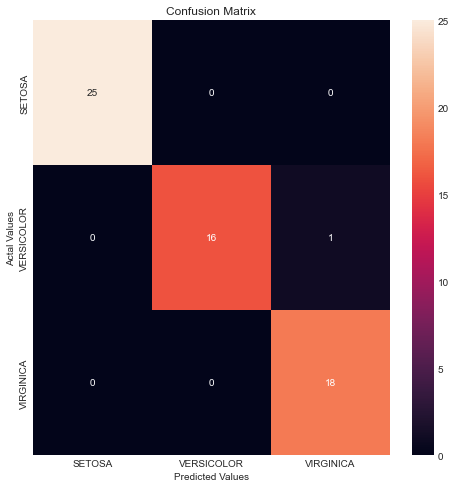

In [34]:
#Plotting the confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(cm_df2, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## 5 - try differents values of the hyper-parameter max_depth (the depth of the three) to get better score. Which value is best ?

In [35]:
d_range = range(1, 10)
scores = []

for k in d_range:
    clf2 = clf2 = DecisionTreeClassifier(ccp_alpha=0.0, 
                            class_weight=None, 
                            criterion='gini',
                            max_depth=k, max_features=None, 
                            max_leaf_nodes=None,
                            min_impurity_decrease=0.0,
                            min_impurity_split=None,
                            min_samples_leaf=1, 
                            min_samples_split=2,
                            min_weight_fraction_leaf=0.0,
                            random_state=None, splitter='best')
    clf2.fit(X_train, y_train)
    y_pred = clf2.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

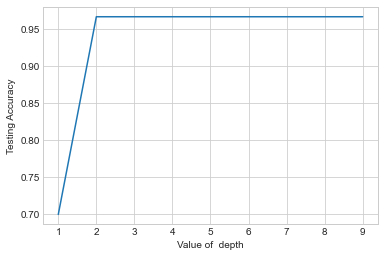

In [36]:
plt.plot(d_range, scores)
plt.xlabel('Value of  depth')
plt.ylabel('Testing Accuracy')